In [1]:
import pandas

datas= pandas.read_csv('Davis.csv', index_col=0)
pandas.get_dummies(datas, columns=['sex'])

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


In [2]:
df=pandas.get_dummies(datas, columns=['sex'])
man = (df["sex_F"] <= 0).sum()
women=(df["sex_M"] <= 0).sum()
print(man/women)

0.7857142857142857


In [3]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.5, stratify=df['sex_M'])
man = (test["sex_F"] <= 0).sum()
women=(train["sex_M"] <= 0).sum()
print(man/women)


0.7857142857142857


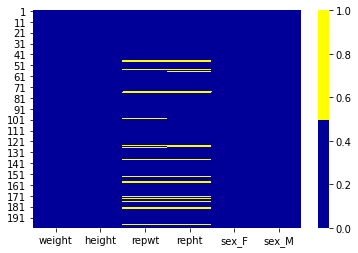

In [4]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
df[cols].describe()

,weight,height,repwt,repht,sex_F,sex_M
count,200.000000,200.000000,183.000000,183.000000,200.000000,200.000000
mean,65.800000,170.020000,65.622951,168.497268,0.560000,0.440000
std,15.095009,12.007937,13.776669,9.467048,0.497633,0.497633
min,39.000000,57.000000,41.000000,148.000000,0.000000,0.000000
25%,55.000000,164.000000,55.000000,160.500000,0.000000,0.000000
50%,63.000000,169.500000,63.000000,168.000000,1.000000,0.000000
75%,74.000000,177.250000,73.500000,175.000000,1.000000,1.000000
max,166.000000,197.000000,124.000000,200.000000,1.000000,1.000000


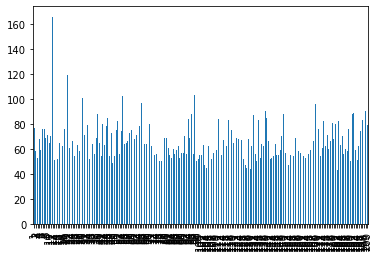

In [6]:
df['weight'].plot.bar()

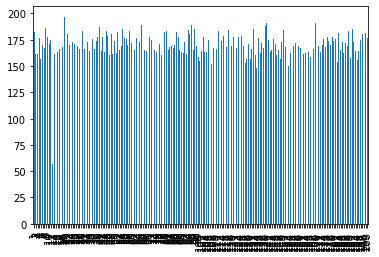

In [7]:
df['height'].plot.bar()


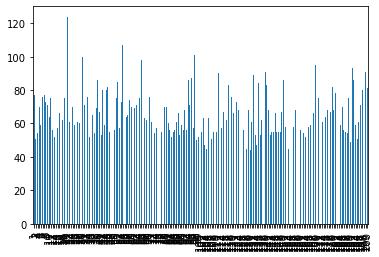

In [8]:
df['repwt'].plot.bar()

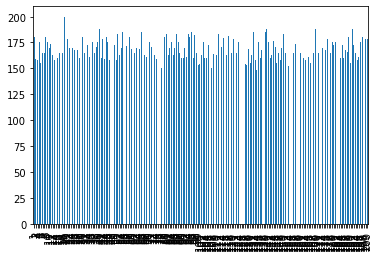

In [9]:
df['repht'].plot.bar()

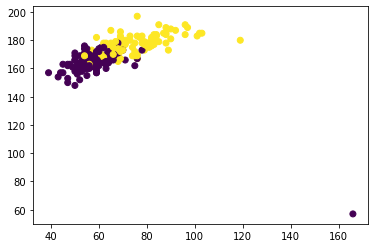

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df["weight"],df['height'], c= df['sex_M'])

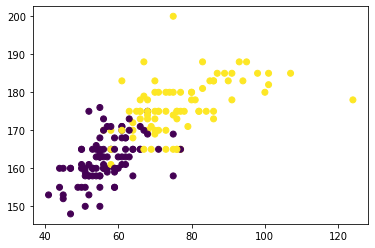

In [11]:
plt.scatter(df['repwt'], df['repht'], c= df['sex_M'])

In [12]:
df = df.drop_duplicates()
df

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


In [13]:
from scipy import stats
import numpy as np
train=train.dropna(axis=0)
train_df=train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
train_df

,weight,height,repwt,repht,sex_F,sex_M
130,44,157,44.0,155.0,1,0
175,62,168,64.0,168.0,0,1
101,55,164,55.0,163.0,1,0
156,54,169,58.0,165.0,0,1
199,90,181,91.0,178.0,0,1
...,...,...,...,...,...,...
169,96,191,95.0,188.0,0,1
195,62,164,61.0,161.0,1,0
36,64,176,65.0,175.0,0,1
163,53,162,52.0,158.0,1,0


In [14]:
test=test.dropna(axis=0)
test_df=test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]
test_df

,weight,height,repwt,repht,sex_F,sex_M
187,60,172,55.0,168.0,1,0
24,66,173,70.0,170.0,0,1
67,64,165,63.0,163.0,1,0
117,83,184,83.0,181.0,0,1
65,97,189,98.0,185.0,0,1
...,...,...,...,...,...,...
42,80,178,80.0,178.0,0,1
162,54,161,54.0,160.0,1,0
74,56,163,57.0,159.0,1,0
139,90,188,91.0,185.0,0,1


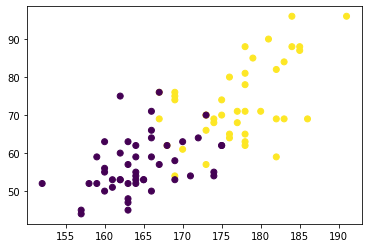

In [15]:
plt.scatter(train_df['height'], train_df['weight'], c= train_df['sex_M'])

# Гистограммы 

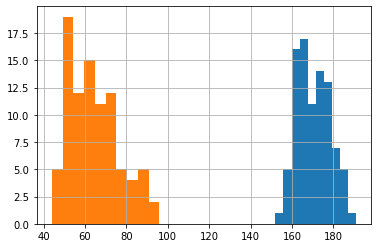

In [16]:
train_df['height'].hist()
train_df["weight"].hist()

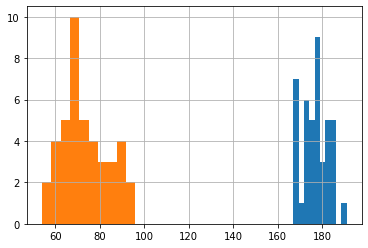

In [17]:
train_df_man= train_df.loc[train_df['sex_M'] ==1]
train_df_man['height'].hist()
train_df_man["weight"].hist()

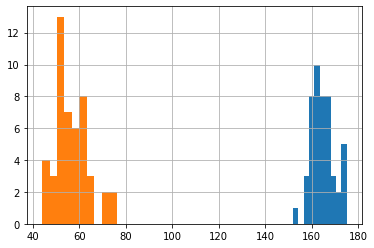

In [18]:
train_df_woman= train_df.loc[train_df['sex_M'] !=1]
train_df_woman['height'].hist()
train_df_woman["weight"].hist()

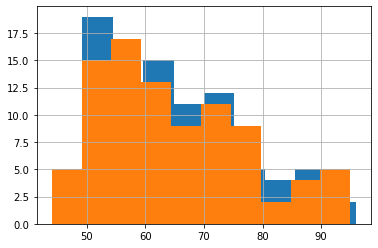

In [19]:
train_df["weight"].hist()
train_df['repwt'].hist()

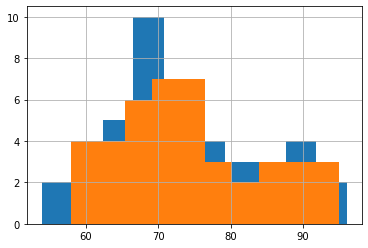

In [20]:
train_df_man["weight"].hist()
train_df_man['repwt'].hist()

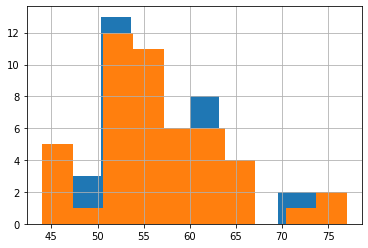

In [21]:
train_df_woman["weight"].hist()
train_df_woman['repwt'].hist()

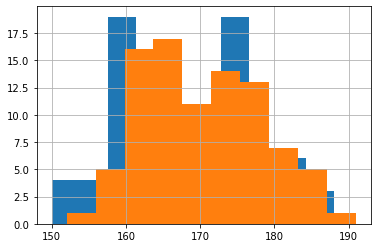

In [22]:
train_df['repht'].hist()
train_df["height"].hist()

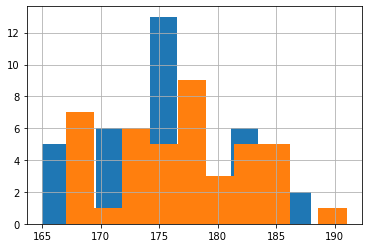

In [23]:
train_df_man['repht'].hist()
train_df_man["height"].hist()

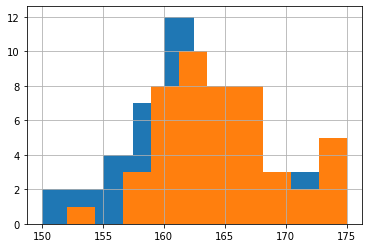

In [24]:
train_df_woman['repht'].hist()
train_df_woman["height"].hist()

In [25]:
ratio_man= man/(man+women)
print(ratio_man)
ratio_woman= 1- ratio_man
print(ratio_woman)

0.44
0.56


In [26]:
a=[0,1]
sex_W_arr=np.random.choice(a,100, p=[ratio_man, ratio_woman])
sex_M_arr=np.abs(sex_W_arr-1)
print(sex_W_arr)
print("___________________________________________________________________________")
print(sex_M_arr)

[1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0]
___________________________________________________________________________
[0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1]


In [27]:
for_generation_woman=train_df_woman.drop(['repwt', 'repht','sex_M'], axis='columns')
for_generation_woman

#for_generation_man=train_df_man.drop(['repwt', 'repht'], axis='columns')
#for_generation_man=train_df_man

,weight,height,sex_F
130,44,157,1
101,55,164,1
66,60,162,1
166,59,159,1
104,45,163,1
188,58,169,1
128,45,157,1
77,50,160,1
49,54,174,1
167,63,170,1


In [28]:
std_h_w=for_generation_woman.drop(['weight','sex_F'], axis='columns').std().values.astype(np.float)
mean_h_w=for_generation_woman.drop(['weight','sex_F'], axis='columns').mean().values.astype(np.float)
print(std_h_w[0], 
      mean_h_w[0])
D_h_w=std_h_w[0]*std_h_w[0]


5.044307233009594 164.54166666666666


In [30]:
std_w_w=for_generation_woman.drop(['height','sex_F'], axis='columns').std().values.astype(np.float)
mean_w_w=for_generation_woman.drop(['height','sex_F'], axis='columns').mean().values.astype(np.float)
print(std_w_w[0], mean_w_w[0])
D_w_w=std_w_w[0]*std_w_w[0]

7.301874819970886 56.791666666666664


In [31]:
pre_cov=(for_generation_woman['height']-mean_h_w)*(for_generation_woman['weight']-mean_w_w)
cov_w= np.mean(pre_cov)

In [35]:
X_woman= np.random.multivariate_normal([mean_h_w[0], mean_w_w[0]], [[D_h_w, cov_w],[cov_w,D_w_w]],size=100)

In [36]:
X_woman

array([[162.53667956,  71.16112124],
       [169.44096198,  50.5088433 ],
       [159.75805245,  48.38194015],
       [159.68512605,  55.97247297],
       [164.02345525,  49.96083682],
       [160.6261398 ,  51.74222905],
       [171.73485781,  59.93936052],
       [167.52099178,  56.01202911],
       [162.73987284,  59.62552413],
       [160.47394012,  50.54807574],
       [161.04078562,  40.8664526 ],
       [157.25031731,  48.92653578],
       [164.00255375,  44.01344564],
       [160.48709519,  51.23016574],
       [156.17611437,  52.30917426],
       [164.44234577,  53.48687251],
       [155.90808696,  56.18277622],
       [172.90579886,  70.32799435],
       [167.09718227,  67.57299279],
       [169.10850176,  48.73256584],
       [157.51475435,  55.41664583],
       [154.57809151,  52.74957045],
       [164.00370497,  51.91453219],
       [164.08035531,  65.36200651],
       [161.25840018,  50.82350071],
       [158.39114846,  61.34555139],
       [167.05344838,  52.17865756],
 

In [37]:
for_generation_man=train_df_man
std_h=for_generation_man.drop(['weight','sex_M'], axis='columns').std().values.astype(np.float)
mean_h=for_generation_man.drop(['weight','sex_M'], axis='columns').mean().values.astype(np.float)
print(std_h[0], 
      mean_h[0])
D_h=std_h[0]*std_h[0]
std_w=for_generation_man.drop(['height','sex_M'], axis='columns').std().values.astype(np.float)
mean_w=for_generation_man.drop(['height','sex_M'], axis='columns').mean().values.astype(np.float)
print(std_w[0], mean_w[0])
D_w=std_w[0]*std_w[0]
pre_cov=(for_generation_man['height']-mean_h[0])*(for_generation_man['weight']- mean_w[0])
cov= np.mean(pre_cov)
X_man= np.random.multivariate_normal([mean_h[0], mean_w[0]], [[D_h, cov],[cov,D_w]],size=100)

5.769930866720705 176.97619047619048
10.414967341064838 73.33333333333333


In [38]:
X_man

array([[180.05487262,  68.46650186],
       [173.98047332,  78.46834955],
       [164.27024397,  58.72279356],
       [174.74220189,  64.59424061],
       [174.19937344,  58.33491037],
       [181.01880689,  75.40192845],
       [175.02717237,  73.7578578 ],
       [182.87071831,  73.99332874],
       [174.71499858,  64.48978157],
       [179.44439298,  71.23885428],
       [173.42046122,  68.52978662],
       [180.7820092 ,  76.54689131],
       [165.6873735 ,  54.75990248],
       [178.53397726,  76.75320625],
       [170.77735115,  72.90281833],
       [180.04403979,  80.24911774],
       [178.27821442,  71.97309981],
       [172.85047464,  61.0104007 ],
       [186.33217564,  72.65852537],
       [181.44570053,  87.08855357],
       [184.45056548,  82.80031489],
       [176.25342996,  84.10421114],
       [166.84521718,  70.84696181],
       [168.14929503,  55.08521078],
       [170.8955349 ,  75.41527066],
       [179.56091633,  88.80748885],
       [181.33472808,  57.57183745],
 

In [39]:
data={}
heights_all=[]
weights_all=[]


for i in range(100):
    if sex_W_arr[i]==1:
        need= X_woman[i]
    else:
         need= X_man[i]
    heights_all.append(need[0])
    weights_all.append(need[1])    
    
data['height']=heights_all
data['weight']=weights_all   
data["sex_F"]=sex_W_arr
data["sex_M"]=sex_M_arr  
generated_df=pandas.DataFrame(data)


In [40]:
generated_df

,height,weight,sex_F,sex_M
0,162.536680,71.161121,1,0
1,173.980473,78.468350,0,1
2,164.270244,58.722794,0,1
3,159.685126,55.972473,1,0
4,164.023455,49.960837,1,0
...,...,...,...,...
95,157.688751,55.664214,1,0
96,159.889500,48.985407,1,0
97,167.569489,50.516261,1,0
98,176.609588,79.623021,0,1


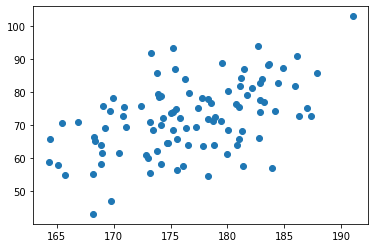

In [41]:
scat_h=[]
scat_w=[]
for i in range(len(X_man)):
    n=X_man[i]
    scat_h.append(n[0])
    scat_w.append(n[1])

plt.scatter(scat_h,scat_w)

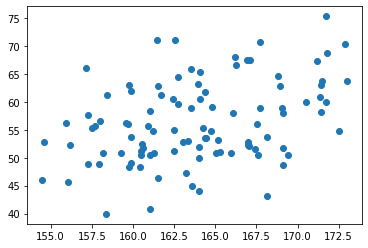

In [42]:
scat_h=[]
scat_w=[]
for i in range(len(X_woman)):
    n=X_woman[i]
    scat_h.append(n[0])
    scat_w.append(n[1])

plt.scatter(scat_h,scat_w)

(100,)


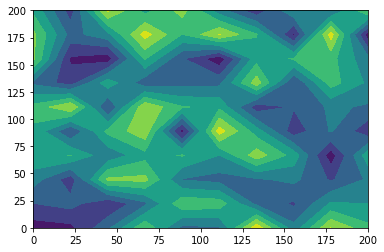

In [57]:
import scipy.stats
ww,bb = np.mgrid[0:200:10j, 0:200:10j]
pdf = scipy.stats.multivariate_normal.pdf(X_woman,mean=[mean_h_w[0], mean_w_w[0]],cov=[[D_h_w, cov_w],[cov_w,D_w_w]])
print(pdf.shape)
plt.contourf(ww, bb, pdf.reshape(ww.shape))

(100,)


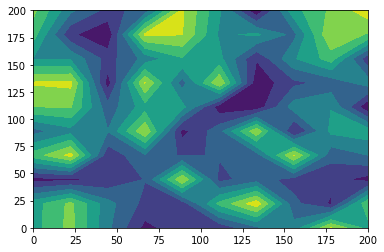

In [58]:

ww,bb = np.mgrid[0:200:10j, 0:200:10j]
pdf = scipy.stats.multivariate_normal.pdf(X_man,mean=[mean_h[0], mean_w[0]],cov=[[D_h, cov],[cov,D_w]])
print(pdf.shape)
plt.contourf(ww, bb, pdf.reshape(ww.shape))

# Задание 2


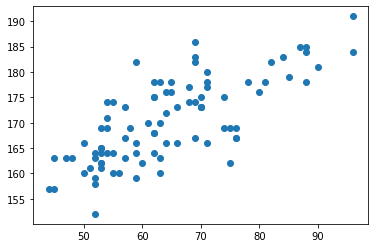

In [59]:
from sklearn.linear_model import LinearRegression
plt.scatter(train_df['weight'], train_df["height"])

In [60]:
lreg=LinearRegression()
reg_h_train=train_df[["height"]].values.astype(np.float)

reg_w_train=train_df['weight'].values.astype(np.float)
print(reg_h_train, reg_w_train )
lreg.fit(reg_h_train, reg_w_train)

[[157.]
 [168.]
 [164.]
 [169.]
 [181.]
 [186.]
 [173.]
 [182.]
 [176.]
 [175.]
 [182.]
 [170.]
 [162.]
 [159.]
 [163.]
 [178.]
 [169.]
 [169.]
 [157.]
 [184.]
 [167.]
 [160.]
 [174.]
 [185.]
 [170.]
 [160.]
 [160.]
 [173.]
 [168.]
 [176.]
 [164.]
 [163.]
 [163.]
 [180.]
 [178.]
 [179.]
 [165.]
 [162.]
 [178.]
 [159.]
 [173.]
 [163.]
 [167.]
 [175.]
 [178.]
 [174.]
 [182.]
 [174.]
 [166.]
 [166.]
 [171.]
 [163.]
 [177.]
 [165.]
 [178.]
 [166.]
 [164.]
 [175.]
 [184.]
 [183.]
 [167.]
 [173.]
 [185.]
 [173.]
 [177.]
 [164.]
 [152.]
 [158.]
 [169.]
 [161.]
 [166.]
 [163.]
 [174.]
 [164.]
 [178.]
 [169.]
 [166.]
 [183.]
 [160.]
 [161.]
 [162.]
 [169.]
 [175.]
 [167.]
 [172.]
 [191.]
 [164.]
 [176.]
 [162.]
 [178.]] [44. 62. 55. 54. 90. 69. 70. 59. 80. 74. 69. 61. 60. 59. 45. 88. 58. 74.
 45. 88. 76. 50. 54. 88. 63. 55. 56. 57. 62. 65. 54. 48. 47. 71. 78. 85.
 53. 75. 65. 52. 66. 52. 57. 70. 81. 69. 82. 68. 66. 64. 54. 63. 71. 53.
 62. 59. 59. 62. 96. 84. 76. 70. 87. 70. 68. 52. 52. 52. 76.

LinearRegression()

In [61]:
lreg_pred=lreg.predict(test_df[["height"]])

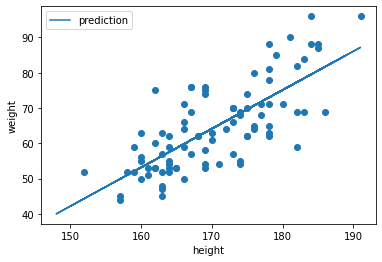

In [62]:
plt.scatter(train_df["height"], train_df['weight'])
plt.plot(test_df["height"], lreg_pred, label="prediction")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_df['weight'], lreg_pred)

60.816532425244965

In [64]:
def get_error(w_,predict_w,len_):
    err=[]
    for i in range(len_):
        err.append(1/len_*((w_[i]-predict_w[i])**2))
    return(err)
    

In [65]:
errs=get_error(test_df['weight'].values.astype(np.float),lreg_pred, len(lreg_pred ))
ww,bb = np.mgrid[0:2:200j, -200:200:200j]


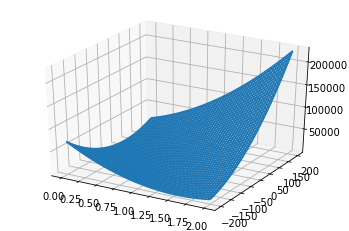

In [66]:
err = []
h_ = train_df['height'].values.astype(np.float)
w_ = train_df['weight'].values.astype(np.float)
for w, b in zip(ww.ravel(),bb.ravel()):
    err.append(1/len(h_) * np.sum((w_ - w * h_ - b)**2))
err = np.array(err)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, err.reshape(ww.shape))

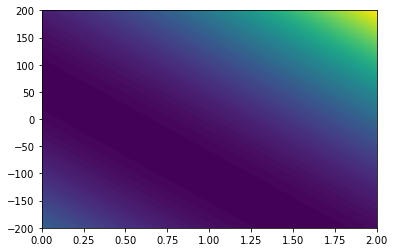

In [67]:
plt.contourf(ww,bb,err.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)


In [68]:
new_train_df=train_df.drop(["sex_F"], axis=1)
new_train_df=new_train_df.drop(["repwt"], axis=1)
new_train_df=new_train_df.drop(["repht"], axis=1)
new_train_df

,weight,height,sex_M
130,44,157,0
175,62,168,1
101,55,164,0
156,54,169,1
199,90,181,1
...,...,...,...
169,96,191,1
195,62,164,0
36,64,176,1
163,53,162,0


In [69]:
lr_new= LinearRegression()
lr_new.fit(new_train_df.drop(["weight"], axis=1).values.astype(np.float), new_train_df["weight"].values.astype(np.float))

LinearRegression()

In [70]:
new_test_df=test_df.drop(["sex_F"], axis=1)
new_test_df=new_test_df.drop(["repwt"], axis=1)
new_test_df=new_test_df.drop(["repht"], axis=1)
new_test_df

,weight,height,sex_M
187,60,172,0
24,66,173,1
67,64,165,0
117,83,184,1
65,97,189,1
...,...,...,...
42,80,178,1
162,54,161,0
74,56,163,0
139,90,188,1


In [71]:
lr_pred_new=lr_new.predict(new_test_df.drop(["weight"], axis=1).values.astype(np.float))

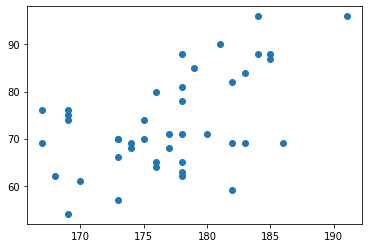

In [72]:
train_df_man = new_train_df.loc[new_train_df['sex_M'] ==1]
test_df_man = new_test_df.loc[new_test_df['sex_M'] ==1]
plt.scatter(train_df_man["height"], train_df_man['weight'])


In [73]:
mean_squared_error(new_test_df['weight'], lr_pred_new)

56.14443248928912

# Градиентным спуском

In [74]:
gr_train_df=train_df.drop(["sex_F","sex_M","repwt","repht"], axis='columns')

In [75]:
gr_train_df.mean()

weight     64.511111
height    170.344444
dtype: float64

In [76]:
gr_train_df.std()

weight    12.124119
height     8.227333
dtype: float64

In [77]:
gr_train_df_scale = (gr_train_df - gr_train_df.mean()) / gr_train_df.std()

In [78]:
ww,bb = np.mgrid[-1:1:200j, -5:5:200j]
L = []
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(gr_train_df_scale['height'].values) * np.sum((gr_train_df_scale['weight'].values - w * gr_train_df_scale['height'].values - b)**2))
L = np.array(L)

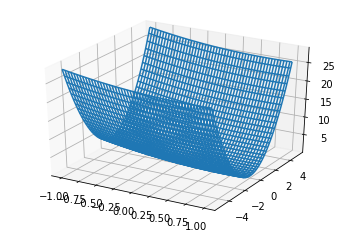

In [79]:
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

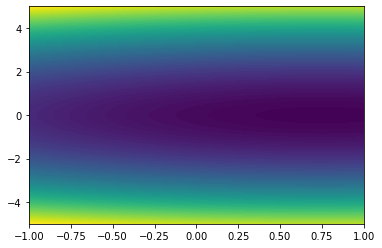

In [80]:
plt.contourf(ww,bb,L.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

In [81]:
w = 1
b = 1
alpha = 0.002

x = gr_train_df_scale['height'].values
y = gr_train_df_scale['weight'].values
N = len(x)
E = 2



for i in range(9300):
    min_ = (1/N * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    norm = np.sqrt(d_w**2 + d_b**2)
    
    if norm > E:
        small_n = norm / E
        d_w = d_w/ small_n
        d_b = d_b / small_n
    w = w - alpha * d_w
    b = b - alpha * d_b
print("w= {} , b = {}".format(w,b))
print("min = {}".format( min_))

w= 0.7449196939117323 , b = 8.204156705732936e-09
min = 0.4401491573080821


In [82]:
gr_lr = LinearRegression().fit(gr_train_df_scale['height'].values.reshape(-1,1),gr_train_df_scale['weight'].values)
gr_lr.coef_

array([0.74491969])